In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
#descargar los datos e identificar los directorios doonde están
URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=URL, extract=True)

print(zip_dir)
zip_dir_base = os.path.dirname(zip_dir)

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

C:\Users\nargel\.keras\datasets\cats_and_dogs_filterted.zip


In [5]:
#data generators
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val



In [30]:
def plotImages(images_arr):
    fig, axes = plt.subplots(4, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [32]:
#data augmentation
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=200,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(150,150),
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.


In [33]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=200,
                                                 directory=validation_dir,
                                                 target_size=(150, 150),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(2,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [36]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(200))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(200)))
)

Train for 10 steps, validate for 5 steps
Epoch 1/100
10/10 [==============================] - 96s 10s/step - loss: 0.8022 - accuracy: 0.4980 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 76s 8s/step - loss: 0.6927 - accuracy: 0.4965 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 77s 8s/step - loss: 0.6876 - accuracy: 0.5355 - val_loss: 0.6685 - val_accuracy: 0.5370
Epoch 4/100
10/10 [==============================] - 77s 8s/step - loss: 0.6782 - accuracy: 0.5650 - val_loss: 0.7113 - val_accuracy: 0.5060
Epoch 5/100
10/10 [==============================] - 47s 5s/step - loss: 0.6853 - accuracy: 0.5430 - val_loss: 0.6853 - val_accuracy: 0.5610
Epoch 6/100
10/10 [==============================] - 35s 4s/step - loss: 0.6759 - accuracy: 0.5770 - val_loss: 0.6517 - val_accuracy: 0.5670
Epoch 7/100
10/10 [==============================] - 35s 3s/step - loss: 0.6504 - accuracy: 0.5840 - val_loss: 0

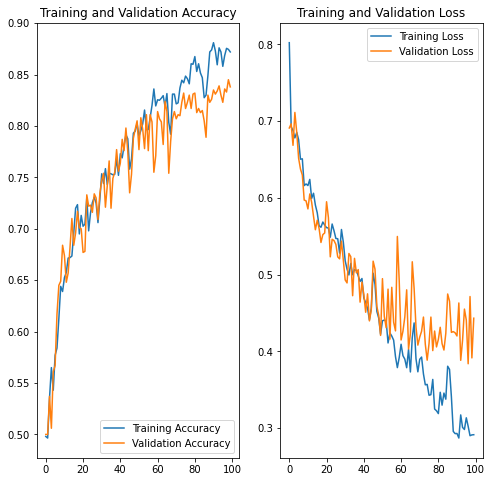

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

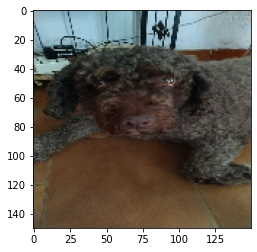

In [38]:
from tensorflow.keras.preprocessing.image import load_img
# cargar una imagen desde un archivo
image = load_img('saga.jpg', target_size=(150, 150))
image2 = load_img('perro.jpg', target_size=(150, 150))
image3 =load_img('salm.jpg', target_size=(150, 150))

pix = np.array(image.getdata()).reshape(image.size[0], image.size[1], 3)
pix= pix /255.0 #normalizar imagen

pix2 = np.array(image2.getdata()).reshape(image2.size[0], image2.size[1], 3)
pix2= pix2 /255.0 #normalizar imagen


pix3 = np.array(image3.getdata()).reshape(image3.size[0], image3.size[1], 3)
pix3= pix3 /255.0 #normalizar imagen
#pix = np.expand_dims(pix, axis=0)

plt.imshow(pix3)

In [39]:

pix = np.expand_dims(pix, axis=0)

pix2 = np.expand_dims(pix2, axis=0)

pix3 = np.expand_dims(pix3, axis=0)

model.predict(pix)#prueba con la gata de mi pareja



array([[ 0.6856347, -0.7501885]], dtype=float32)

In [40]:
model.predict(pix2)#prueba con un perro de internet


array([[-1.1166046,  1.0118822]], dtype=float32)

In [41]:
model.predict(pix3)#prueba con perro de salmeron

array([[-0.7844383 ,  0.72971314]], dtype=float32)